In [1]:
import pandas as pd
import numpy as np
import uci_dataset as database

import raimitigations.dataprocessing as dp

# Case Study 3

## 1 - Understanding the Data

In [2]:
df = database.load_thyroid_disease()
label_col = "sick-euthyroid"
df

,sick-euthyroid,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,sick-euthyroid,72.0,M,f,f,f,f,f,f,f,...,y,1.0,y,83.0,y,0.95,y,87.0,n,NaN
1,sick-euthyroid,45.0,F,f,f,f,f,f,f,f,...,y,1.0,y,82.0,y,0.73,y,112.0,n,NaN
2,sick-euthyroid,64.0,F,f,f,f,f,f,f,f,...,y,1.0,y,101.0,y,0.82,y,123.0,n,NaN
3,sick-euthyroid,56.0,M,f,f,f,f,f,f,f,...,y,0.8,y,76.0,y,0.77,y,99.0,n,NaN
4,sick-euthyroid,78.0,F,t,f,f,f,t,f,f,...,y,0.3,y,87.0,y,0.95,y,91.0,n,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,negative,40.0,F,f,f,f,f,f,f,f,...,y,1.2,y,76.0,y,0.90,y,84.0,n,NaN
3159,negative,69.0,F,f,f,f,f,f,f,f,...,y,1.8,y,126.0,y,1.02,y,124.0,n,NaN
3160,negative,58.0,F,f,f,f,f,f,f,f,...,y,1.7,y,86.0,y,0.91,y,95.0,n,NaN
3161,negative,29.0,F,f,f,f,f,f,f,f,...,y,1.8,y,99.0,y,1.01,y,98.0,n,NaN


In [3]:
df[label_col] = df[label_col].replace({"sick-euthyroid": 1, "negative": 0})

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   sick-euthyroid             3163 non-null   int64  
 1   age                        2717 non-null   float64
 2   sex                        3090 non-null   object 
 3   on_thyroxine               3163 non-null   object 
 4   query_on_thyroxine         3163 non-null   object 
 5   on_antithyroid_medication  3163 non-null   object 
 6   thyroid_surgery            3163 non-null   object 
 7   query_hypothyroid          3163 non-null   object 
 8   query_hyperthyroid         3163 non-null   object 
 9   pregnant                   3163 non-null   object 
 10  sick                       3163 non-null   object 
 11  tumor                      3163 non-null   object 
 12  lithium                    3163 non-null   object 
 13  goitre                     3163 non-null   objec

In [5]:
df['query_on_thyroxine'].value_counts()

f    3108
t      55
Name: query_on_thyroxine, dtype: int64

In [6]:
counts = df['query_on_thyroxine'].value_counts().values
counts

array([3108,   55])

In [7]:
cor_feat = dp.CorrelatedFeatures(
					method_num_num=["spearman", "pearson", "kendall"],				# Used for Numerical x Numerical correlations
					num_corr_th=0.9,												# Used for Numerical x Numerical correlations
					num_pvalue_th=0.05,												# Used for Numerical x Numerical correlations
					method_num_cat="model",											# Used for Numerical x Categorical correlations
					model_metrics=["f1", "auc"],									# Used for Numerical x Categorical correlations
					metric_th=0.9,													# Used for Numerical x Categorical correlations
					cat_corr_th=0.9,												# Used for Categorical x Categorical correlations
					cat_pvalue_th=0.01,												# Used for Categorical x Categorical correlations
					json_summary="./corr_json/c3_summary.json",
					json_corr="./corr_json/c3_corr.json",
					json_uncorr="./corr_json/c3_uncorr.json"
				)
cor_feat.fit(df=df, label_col=label_col)

Remember to look through the JSON files generated in the previous cell

## 2 - Basic Pre-Processing

### Encode Categorical Variables

In [10]:
# Encode the categorical columns using One-Hot Encoding
enc_ohe = dp.EncoderOHE()
enc_ohe.fit(df)
proc_df = enc_ohe.transform(df)
proc_df

No columns specified for encoding. These columns have been automatically identfied as the following:
['sex', 'on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid', 'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre', 'TSH_measured', 'T3_measured', 'TT4_measured', 'T4U_measured', 'FTI_measured', 'TBG_measured']


,sick-euthyroid,age,TSH,T3,TT4,T4U,FTI,TBG,sex_M,sex_nan,...,sick_t,tumor_t,lithium_t,goitre_t,TSH_measured_y,T3_measured_y,TT4_measured_y,T4U_measured_y,FTI_measured_y,TBG_measured_y
0,1,72.0,NaN,1.0,83.0,0.95,87.0,NaN,1,0,...,0,0,0,0,0,1,1,1,1,0
1,1,45.0,1.90,1.0,82.0,0.73,112.0,NaN,0,0,...,0,0,0,0,1,1,1,1,1,0
2,1,64.0,0.09,1.0,101.0,0.82,123.0,NaN,0,0,...,1,0,0,0,1,1,1,1,1,0
3,1,56.0,0.00,0.8,76.0,0.77,99.0,NaN,1,0,...,0,0,0,0,1,1,1,1,1,0
4,1,78.0,2.60,0.3,87.0,0.95,91.0,NaN,0,0,...,0,0,0,0,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,0,40.0,2.10,1.2,76.0,0.90,84.0,NaN,0,0,...,1,0,0,0,1,1,1,1,1,0
3159,0,69.0,2.60,1.8,126.0,1.02,124.0,NaN,0,0,...,0,0,0,0,1,1,1,1,1,0
3160,0,58.0,5.80,1.7,86.0,0.91,95.0,NaN,0,0,...,0,0,0,0,1,1,1,1,1,0
3161,0,29.0,0.80,1.8,99.0,1.01,98.0,NaN,0,0,...,0,0,0,0,1,1,1,1,1,0


### Impute Missing Data

In [12]:
proc_df.isna().sum()

sick-euthyroid                    0
age                             446
TSH                             468
T3                              695
TT4                             249
T4U                             248
FTI                             247
TBG                            2903
sex_M                             0
sex_nan                           0
on_thyroxine_t                    0
query_on_thyroxine_t              0
on_antithyroid_medication_t       0
thyroid_surgery_t                 0
query_hypothyroid_t               0
query_hyperthyroid_t              0
pregnant_t                        0
sick_t                            0
tumor_t                           0
lithium_t                         0
goitre_t                          0
TSH_measured_y                    0
T3_measured_y                     0
TT4_measured_y                    0
T4U_measured_y                    0
FTI_measured_y                    0
TBG_measured_y                    0
dtype: int64

In [14]:
imputer = dp.BasicImputer(numerical={'missing_values':np.nan,
									'strategy':'constant',
									'fill_value':-1})
imputer.fit(proc_df)
proc_df = imputer.transform(proc_df)

No columns specified for imputation. These columns have been automatically identified:
['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']


### Split Dataset

In [16]:
train_x, test_x, train_y, test_y = dp.split_data(proc_df, label_col, test_size=0.25)

## 2 - Baseline Models

/home/matheus/miniconda3/envs/resp/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


------------
TEST
------------
[[705  13]
 [  6  67]]


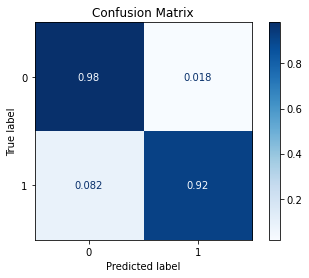

Acuracy: 97.60%
Precision:  0.9145305907172996
Recall:  0.9498511847979547
F1 =  0.9312604911337057
ROC AUC =  0.9742816804670508
best_th = 0.254520058631897


In [17]:
model = dp.train_model_plot_results(train_x, train_y, test_x, test_y, model_name="xgb", train_result=False, plot_pr=False)

------------
TEST
------------
[[527 191]
 [ 25  48]]


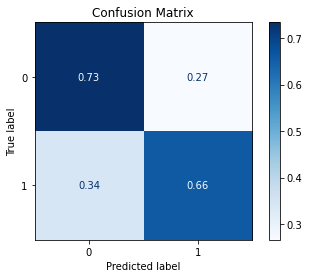

Acuracy: 72.69%
Precision:  0.5777734825056091
Recall:  0.6957587667417102
F1 =  0.5688067837674137
ROC AUC =  0.7241672072347083
best_th = 0.2


In [19]:
model = dp.train_model_plot_results(train_x, train_y, test_x, test_y, model_name="knn", train_result=False, plot_pr=False)

## 3 - Data Transformation

### DataMinMaxScaler

------------
TEST
------------
[[614 104]
 [ 14  59]]


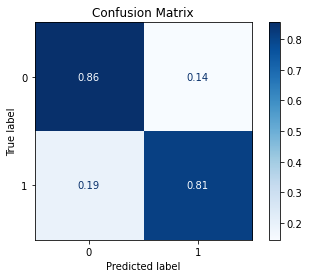

Acuracy: 85.08%
Precision:  0.6698350982767379
Recall:  0.8316861907124051
F1 =  0.7061664190193164
ROC AUC =  0.8658850688747282
best_th = 0.2


In [34]:
scaler = dp.DataMinMaxScaler()
scaler.fit(train_x)
train_x_scl = scaler.transform(train_x)
test_x_scl = scaler.transform(test_x)
model = dp.train_model_plot_results(train_x_scl, train_y, test_x_scl, test_y, model_name="knn", train_result=False, plot_pr=False)

### DataNormalizer

No columns specified for imputation. These columns have been automatically identified:
[]
------------
TEST
------------
[[550 168]
 [ 21  52]]


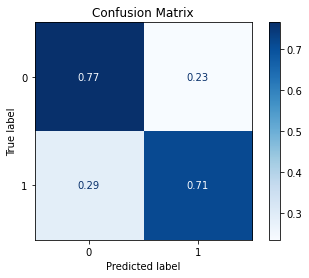

Acuracy: 76.11%
Precision:  0.599793026588123
Recall:  0.7391727401076048
F1 =  0.6041617572687773
ROC AUC =  0.7678864425535161
best_th = 0.2


In [35]:
scaler = dp.DataNormalizer()
scaler.fit(train_x)
train_x_scl = scaler.transform(train_x)
test_x_scl = scaler.transform(test_x)
model = dp.train_model_plot_results(train_x_scl, train_y, test_x_scl, test_y, model_name="knn", train_result=False, plot_pr=False)

### DataQuantileTransformer

------------
TEST
------------
[[623  95]
 [ 15  58]]


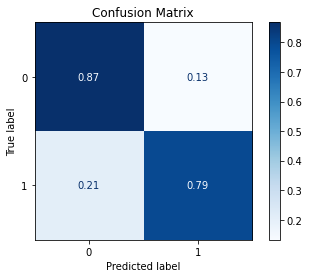

Acuracy: 86.09%
Precision:  0.6777869977667138
Recall:  0.8311042851146639
F1 =  0.7160766961651917
ROC AUC =  0.8570706299843553
best_th = 0.2


In [37]:
scaler = dp.DataQuantileTransformer()
scaler.fit(train_x)
train_x_scl = scaler.transform(train_x)
test_x_scl = scaler.transform(test_x)
model = dp.train_model_plot_results(train_x_scl, train_y, test_x_scl, test_y, model_name="knn", train_result=False, plot_pr=False)

### DataRobustScaler

------------
TEST
------------
[[643  75]
 [ 16  57]]


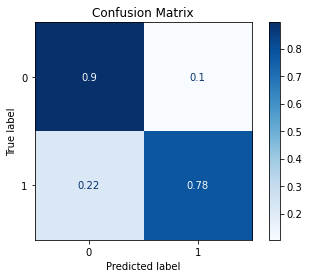

Acuracy: 88.50%
Precision:  0.7037694854462685
Recall:  0.8381825466478422
F1 =  0.7450059337194679
ROC AUC =  0.8543041935360781
best_th = 0.2


In [38]:
scaler = dp.DataRobustScaler()
scaler.fit(train_x)
train_x_scl = scaler.transform(train_x)
test_x_scl = scaler.transform(test_x)
model = dp.train_model_plot_results(train_x_scl, train_y, test_x_scl, test_y, model_name="knn", train_result=False, plot_pr=False)

### DataPowerTransformer

------------
TEST
------------
[[620  98]
 [ 15  58]]


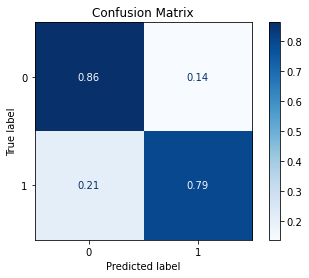

Acuracy: 85.71%
Precision:  0.6740864122753887
Recall:  0.8290151486244133
F1 =  0.7115160552161297
ROC AUC =  0.8544568245125349
best_th = 0.2


In [39]:
scaler = dp.DataPowerTransformer()
scaler.fit(train_x)
train_x_scl = scaler.transform(train_x)
test_x_scl = scaler.transform(test_x)
model = dp.train_model_plot_results(train_x_scl, train_y, test_x_scl, test_y, model_name="knn", train_result=False, plot_pr=False)

### DataStandardScaler

------------
TEST
------------
[[617 101]
 [ 13  60]]


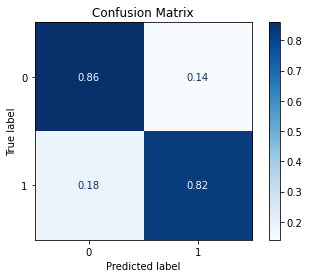

Acuracy: 85.59%
Precision:  0.6760179434092477
Recall:  0.840624642271149
F1 =  0.7141253899414136
ROC AUC =  0.8734212233372763
best_th = 0.2


In [40]:
scaler = dp.DataStandardScaler()
scaler.fit(train_x)
train_x_scl = scaler.transform(train_x)
test_x_scl = scaler.transform(test_x)
model = dp.train_model_plot_results(train_x_scl, train_y, test_x_scl, test_y, model_name="knn", train_result=False, plot_pr=False)

## 4 - Feature Selection

In [41]:
feat_sel = dp.SeqFeatSelection(n_jobs=4, forward=False)
feat_sel.fit(X=train_x_scl, y=train_y)
train_x_sel = feat_sel.transform(train_x_scl)
test_x_sel = feat_sel.transform(test_x_scl)

No columns specified for imputation. These columns have been automatically identified:
[]
No columns specified for encoding. These columns have been automatically identfied as the following:
[]


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  26 out of  26 | elapsed:    0.8s finished

[2022-03-16 16:08:15] Features: 25/1 -- score: 0.868352971568951[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  18 out of  25 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  25 out of  25 | elapsed:    0.1s finished

[2022-03-16 16:08:15] Features: 24/1 -- score: 0.8632533407171614[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 out of  24 | elapsed:    0.1s finished

[2022-03-16 16:08:15] Features: 23/1 -- score: 0.8709135937889458[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  23 out of  23 | elapsed:    0.1s finished

[2022-03-16 16:08:15] Features: 22/1 -- score: 0.8856119339760764[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[P

In [42]:
feat_sel.get_selected_features()

['T3', 'pregnant_t', 'FTI_measured_y']

------------
TEST
------------
[[649  69]
 [  2  71]]


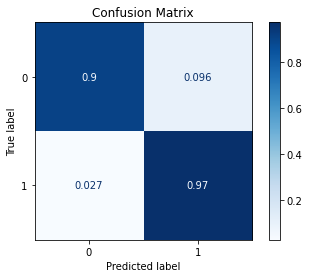

Acuracy: 91.02%
Precision:  0.7520353302611367
Recall:  0.9382512305872477
F1 =  0.8074019965911858
ROC AUC =  0.9573491815163887
best_th = 0.2


In [43]:
model = dp.train_model_plot_results(train_x_sel, train_y, test_x_sel, test_y, model_name="knn", train_result=False, plot_pr=False)

## 5 - Synthetic Data

### imblearn Library

In [44]:
train_y.value_counts()

0    2152
1     220
Name: sick-euthyroid, dtype: int64

In [47]:
rebalance = dp.Rebalance(
				X=train_x_sel,
				y=train_y,
				strategy_over={0:2152, 1:400},
				over_sampler=True,
				under_sampler=False
			)
train_x_res, train_y_res = rebalance.fit_resample()
train_y_res.value_counts()

No columns specified for imputation. These columns have been automatically identified:
[]

SMOTE.

Running oversampling...
...finished


0    2152
1     400
Name: sick-euthyroid, dtype: int64

------------
TEST
------------
[[649  69]
 [  2  71]]


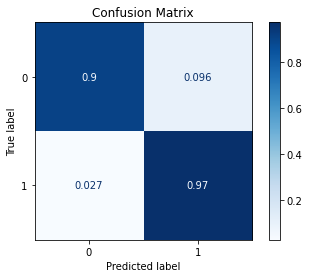

Acuracy: 91.02%
Precision:  0.7520353302611367
Recall:  0.9382512305872477
F1 =  0.8074019965911858
ROC AUC =  0.9585988476361278
best_th = 0.2


In [48]:
model = dp.train_model_plot_results(train_x_res, train_y_res, test_x_sel, test_y, model_name="knn", train_result=False, plot_pr=False)

### Creating Artificial Data using Deep Learning

#### CTGAN

Let's use the dataset with the original categorical variables, since CTGAN is capable of dealing with categorical variables internally. We will start by re-encoding the ordinal variables. We then proceed to split the dataset before using the CTGAN. This guarantees that we don't contaminate our test set.

In [69]:
synth = dp.Synthesizer(
				X=train_x_sel,
				y=train_y,
				epochs=400,
				model="ctgan",
				load_existing=True
			)
synth.fit()

conditions = {label_col:1}	# create more of the undersampled class
syn_train_x, syn_train_y = synth.transform(X=train_x_sel, y=train_y, n_samples=200, conditions=conditions)

syn_train_y.value_counts()

Loading existing sythesizer model (CTGAN_400.pkl)...
LOADED model of class CTGAN.


0    2152
1     420
Name: sick-euthyroid, dtype: int64

------------
TEST
------------
[[649  69]
 [  2  71]]


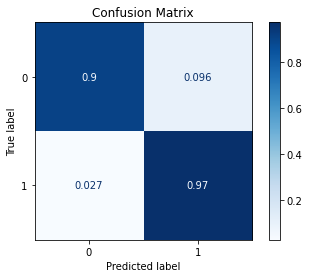

Acuracy: 91.02%
Precision:  0.7520353302611367
Recall:  0.9382512305872477
F1 =  0.8074019965911858
ROC AUC =  0.9589995039493265
best_th = 0.2


In [70]:
model = dp.train_model_plot_results(syn_train_x, syn_train_y, test_x_sel, test_y, model_name="knn", train_result=False, plot_pr=False)

Let's try creating more artificial instances and check how this impacts the model's performance.

------------
TEST
------------
[[604 114]
 [  0  73]]


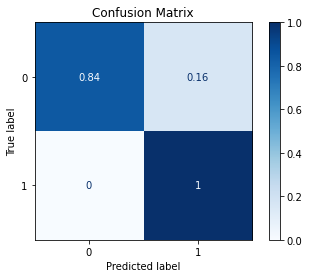

Acuracy: 85.59%
Precision:  0.6951871657754011
Recall:  0.9206128133704735
F1 =  0.7376527406028162
ROC AUC =  0.9649902697752508
best_th = 0.2


In [77]:
conditions = {label_col:1}	# create more of the undersampled class
syn_train_x, syn_train_y = synth.transform(X=train_x_sel, y=train_y, n_samples=600, conditions=conditions)

model = dp.train_model_plot_results(syn_train_x, syn_train_y, test_x_sel, test_y, model_name="knn", train_result=False, plot_pr=False)

#### TVAE

/home/matheus/miniconda3/envs/resp/lib/python3.7/site-packages/sklearn/mixture/_base.py:282: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  ConvergenceWarning,
/home/matheus/miniconda3/envs/resp/lib/python3.7/site-packages/sklearn/mixture/_base.py:146: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  .fit(X)
/home/matheus/miniconda3/envs/resp/lib/python3.7/site-packages/sklearn/mixture/_base.py:146: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  .fit(X)


------------
TEST
------------
[[677  41]
 [  6  67]]


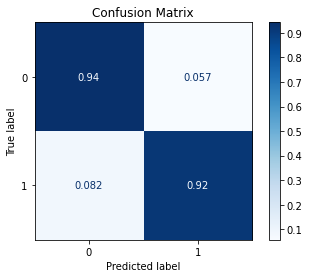

Acuracy: 94.06%
Precision:  0.8057927986551705
Recall:  0.930352577555615
F1 =  0.8533920128085306
ROC AUC =  0.9656866486053345
best_th = 0.4


In [78]:
synth = dp.Synthesizer(
				X=train_x_sel,
				y=train_y,
				epochs=400,
				model="tvae",
				load_existing=True
			)
synth.fit()

conditions = {label_col:1}	# create more of the undersampled class
syn2_train_x, syn2_train_y = synth.transform(X=train_x_sel, y=train_y, n_samples=200, conditions=conditions)

model = dp.train_model_plot_results(syn2_train_x, syn2_train_y, test_x_sel, test_y, model_name="knn", train_result=False, plot_pr=False)